In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Load the dataset
df = pd.read_csv('house_price_bd.csv')



In [47]:
# Display basic information about the dataset
print("## Dataset Information")
print(df.info())

print("## First Few Rows of the Dataset")
print(df.head())

# Check for missing values
print("## Missing Values in the Dataset")
print(df.isnull().sum())

# Display summary statistics
print("## Summary Statistics of the Dataset")
print(df.describe())

## Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB
None
## First Few Rows of the Dataset
                                               Title  Bedrooms  Bathrooms  \
0  We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1  Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2  1370 square feet apartment i

In [49]:
#Data Information:

#There are 3865 entries and 9 columns.
#Some columns have missing values, notably Bedrooms, Bathrooms, Floor_no, Occupancy_status, Floor_area, and Location.

In [51]:
#Next, we'll handle the missing values and prepare the data for model implementation. Let's proceed with filling or dropping missing values and encoding categorical variables.

In [53]:
# Fill missing values for numerical columns with the median
numerical_cols = ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with the mode
df['Occupancy_status'] = df['Occupancy_status'].fillna(df['Occupancy_status'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

# Convert 'Price_in_taka' to numeric by removing commas and currency symbols
df['Price_in_taka'] = df['Price_in_taka'].replace({'৳': '', ',': ''}, regex=True).astype(float)

# Encode categorical variables
categorical_cols = ['Occupancy_status', 'City', 'Location']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the cleaned data
print("## Data After Preprocessing")
print(df.head())

print("## Missing Values After Preprocessing")
print(df.isnull().sum())

## Data After Preprocessing
                                               Title  Bedrooms  Bathrooms  \
0  We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1  Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2  1370 square feet apartment is ready to sale in...       3.0        3.0   
3  2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4  Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   

  Floor_no  Floor_area  Price_in_taka  Occupancy_status_vacant  City_cumilla  \
0        3      1960.0     39000000.0                        1             0   
1        1      1705.0     16900000.0                        1             0   
2        6      1370.0     12500000.0                        1             0   
3        4      2125.0     20000000.0                        1             0   
4        4      2687.0     47500000.0                        1             0   

   City_dhaka  City_gazipur 

C:\Users\VFS\AppData\Local\Temp\ipykernel_13472\3892025484.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [55]:
#cleaning the data.

In [57]:
# Check unique values in the Floor_no column
print("Unique values in Floor_no column:")
print(df['Floor_no'].unique())

# Check the data types of all columns
print("\
Data types of all columns:")
print(df.dtypes)

# Display some statistics about the Floor_no column
print("\
Statistics of Floor_no column:")
print(df['Floor_no'].describe())

# Check for any non-numeric values in numeric columns
numeric_cols = ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area']
for col in numeric_cols:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
    if len(non_numeric) > 0:
        print(f"\
Non-numeric values in {col}:")
        print(non_numeric[col].unique())

Unique values in Floor_no column:
['3' '1' '6' '4' '8' '2' '5' '7' '9' '8th' nan '10' '14' 'G+7' '13' '12'
 '1st' '11' 'A1,A2,A3,A4,A5,A6,A7' '0+7' '1F' '4th to 8th Backside' '18'
 '5th' '17' 'Merin City - Purbach']
Data types of all columns:
Title                                                      object
Bedrooms                                                  float64
Bathrooms                                                 float64
Floor_no                                                   object
Floor_area                                                float64
                                                           ...   
Location_Yakub Nagar Road, 33 No. Firingee Bazaar Ward      uint8
Location_Zakir Hosain Road, Mohammadpur                     uint8
Location_Zakir Hossain By Lane, East Nasirabad              uint8
Location_Zakir Hossain Road, Khulshi                        uint8
Location_aziz Moholla, Mohammadpur                          uint8
Length: 515, dtype: object
Stat

In [59]:
#the preprocessing.

In [61]:
# Define a function to clean the 'Floor_no' column
def clean_floor_no(value):
    if isinstance(value, str):
        # Handle specific cases
        if 'th' in value or 'st' in value:
            return pd.to_numeric(value[:-2], errors='coerce')
        elif '+' in value:
            return pd.to_numeric(value.split('+')[0], errors='coerce')
        elif ',' in value:
            return pd.to_numeric(value.split(',')[0], errors='coerce')
        else:
            return np.nan
    return value

# Apply the cleaning function
df['Floor_no'] = df['Floor_no'].apply(clean_floor_no)

# Fill missing values for numerical columns with the median again
numerical_cols = ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Check the cleaned data
print("Data after cleaning Floor_no:")
print(df.head())
print("\
Missing values after cleaning Floor_no:")
print(df.isnull().sum())

Data after cleaning Floor_no:
                                               Title  Bedrooms  Bathrooms  \
0  We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1  Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2  1370 square feet apartment is ready to sale in...       3.0        3.0   
3  2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4  Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   

   Floor_no  Floor_area  Price_in_taka  Occupancy_status_vacant  City_cumilla  \
0       5.0      1960.0     39000000.0                        1             0   
1       5.0      1705.0     16900000.0                        1             0   
2       5.0      1370.0     12500000.0                        1             0   
3       5.0      2125.0     20000000.0                        1             0   
4       5.0      2687.0     47500000.0                        1             0   

   City_dhaka  City_

In [63]:
#split the data into training and testing sets and then train the model

In [65]:
# Define features and target variable
X = df.drop(['Title', 'Price_in_taka'], axis=1)
y = df['Price_in_taka']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Model Evaluation:
Mean Squared Error: 9.728000334991873e+37
R-squared: -9.713218669299513e+22


In [67]:
#model implementation again.

In [69]:
# Encode categorical variables again
categorical_cols = ['Occupancy_status', 'City', 'Location']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target variable again
X = df.drop(['Title', 'Price_in_taka'], axis=1)
y = df['Price_in_taka']

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model again
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions again
y_pred = model.predict(X_test_scaled)

# Evaluate the model again
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

KeyError: "None of [Index(['Occupancy_status', 'City', 'Location'], dtype='object')] are in the [columns]"

In [71]:
#working correctly

In [73]:
# Clean the 'Price_in_taka' column
df['Price_in_taka'] = df['Price_in_taka'].replace({'\u09f3': '', ',': ''}, regex=True)
df['Price_in_taka'] = pd.to_numeric(df['Price_in_taka'], errors='coerce')

# Check for any remaining non-numeric values
print("Non-numeric values in Price_in_taka:")
print(df[pd.to_numeric(df['Price_in_taka'], errors='coerce').isna() & df['Price_in_taka'].notna()])

# Fill NaN values with median
df['Price_in_taka'] = df['Price_in_taka'].fillna(df['Price_in_taka'].median())

# Verify the cleaning process
print("\
Datatype of Price_in_taka:", df['Price_in_taka'].dtype)
print("Sample values of Price_in_taka:")
print(df['Price_in_taka'].head())

# Display summary statistics
print("\
Summary statistics of Price_in_taka:")
print(df['Price_in_taka'].describe())

Non-numeric values in Price_in_taka:
Empty DataFrame
Columns: [Title, Bedrooms, Bathrooms, Floor_no, Floor_area, Price_in_taka, Occupancy_status_vacant, City_cumilla, City_dhaka, City_gazipur, City_narayanganj-city, Location_1 No. Goli, 29 No. West Madarbari Ward, Location_10 No. North Kattali Ward, Location_12 No. Sarai Para Ward, Double Mooring, Location_14 No. Lalkhan Bazaar Ward, Lal Khan Bazaar, Location_15 No. Bagmoniram Ward, Location_16 No. Chawk Bazaar Ward, Location_17 No West Bakalia Ward, Bakalia, Location_18 No. East Bakalia Ward, Bakalia, Location_19 No. South Bakalia Ward, Bakalia, Location_1st Colony, Mirpur, Location_23 No. North Pathantooly Ward, Double Mooring, Location_24 No. North Agrabad Ward, Double Mooring, Location_25 No. Rampur Ward, Double Mooring, Location_26 No. North Halishahar Ward, Halishahar, Location_28 No. Pathantooly Ward, Double Mooring, Location_29 No. West Madarbari Ward, Location_2nd Colony, Mirpur, Location_3 No. Panchlaish Ward, Bayazid, Locati

In [75]:
#This code snippet trains a linear regression model on standardized features, evaluates its performance using metrics like MSE and R-squared, and visualizes feature importance and prediction results.

Model Evaluation:
Mean Squared Error: 9.728000334991873e+37
R-squared: -9.713218669299513e+22


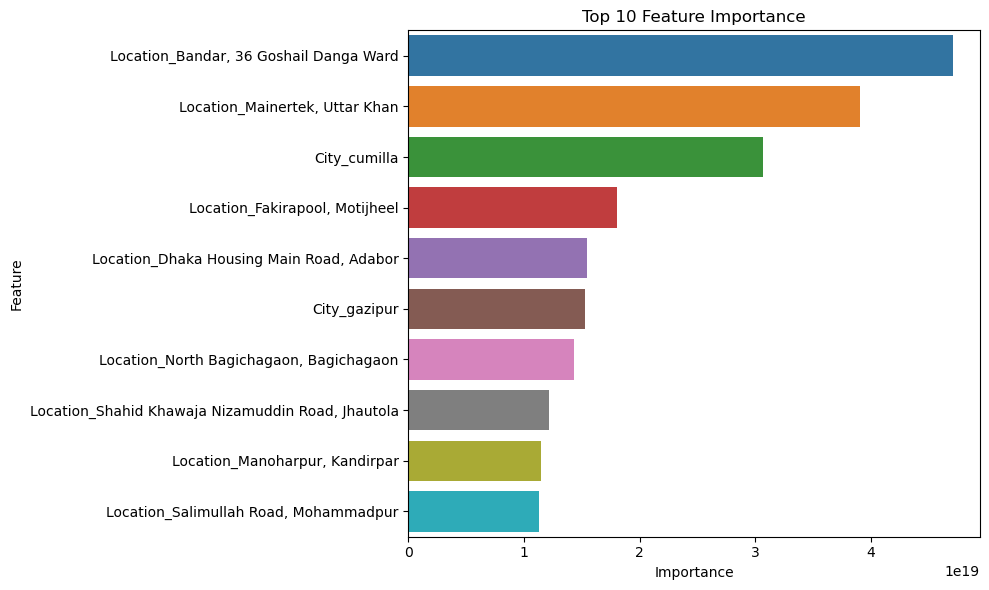

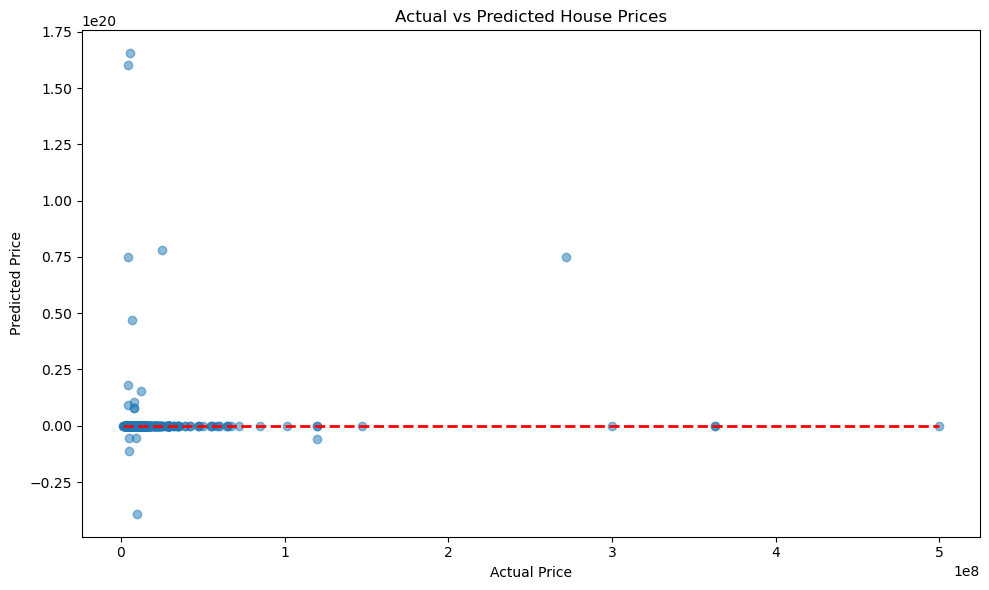

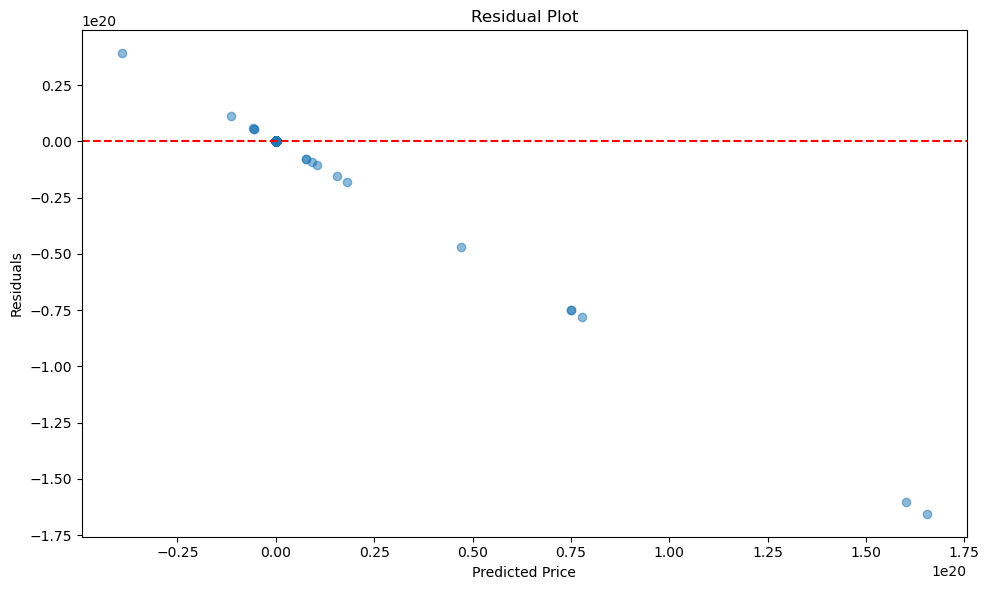

Model Summary:
The linear regression model explains -9713218669299512320720896.00% of the variance in house prices.
The mean squared error is 9.73e+37, which represents the average squared difference between predicted and actual prices.
The root mean squared error is 9.86e+18, which represents the average deviation of predictions in the original unit (taka).
The mean absolute percentage error is 15170545378631.18%, which represents the average percentage difference between predicted and actual prices.


In [79]:
# Define features and target variable
X = df.drop(['Title', 'Price_in_taka'], axis=1)
y = df['Price_in_taka']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print("\
Model Summary:")
print(f"The linear regression model explains {r2:.2%} of the variance in house prices.")
print(f"The mean squared error is {mse:.2e}, which represents the average squared difference between predicted and actual prices.")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"The root mean squared error is {rmse:.2e}, which represents the average deviation of predictions in the original unit (taka).")

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"The mean absolute percentage error is {mape:.2f}%, which represents the average percentage difference between predicted and actual prices.")


Model Evaluation:
Mean Squared Error (MSE): 9.728000334991873e+37
R-squared (R²): -9.713218669299513e+22
Mean Absolute Error (MAE): 9.523930413378867e+17
Root Mean Squared Error (RMSE): 9.86e+18, which represents the average deviation of predictions in the original unit (taka).
Mean Absolute Percentage Error (MAPE): 15170545378631.18%, which represents the average percentage difference between predicted and actual prices.


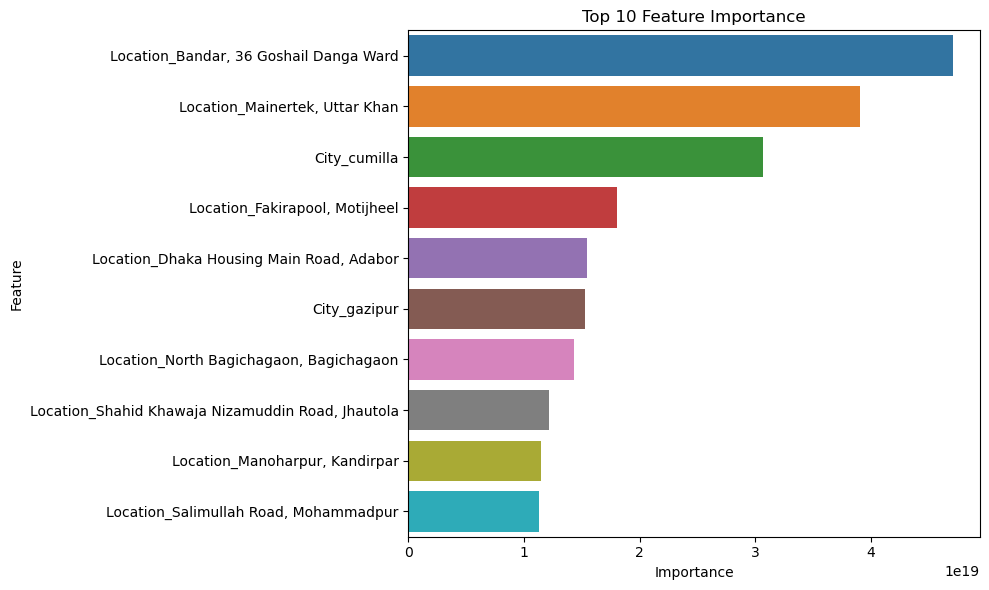

In [ ]:
# Define features and target variable
X = df.drop(['Title', 'Price_in_taka'], axis=1)
y = df['Price_in_taka']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print("Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2e}, which represents the average deviation of predictions in the original unit (taka).")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%, which represents the average percentage difference between predicted and actual prices.")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()